# Check weight weights

author: steeve.laquitaine@epfl.ch  
weights created by: joseph.tharayil@epfl.ch  
last modified: 30-10-2023  
regression: None  
status: OK  
display: up-to-date  

## Setup

Create and activate jupyter kernel `npx_10m_384ch_unit_classes`

In [4]:
import os 
import h5py
from matplotlib import pyplot as plt
import numpy as np

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells
from src.nodes import viz 

# SET EXPERIMENT PARAMETERS
EXP = "silico_horvath"
SIMULATION_DATE = "probe_1"
data_conf, param_conf = get_config(EXP, SIMULATION_DATE).values()
WEIGHT_PATH = data_conf["campaign"]["source_weights"]
N_CONTACTS = 128

2023-10-30 11:01:34,646 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-30 11:01:34,662 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [ ]:
print("unit-test source weight file read path:", WEIGHT_PATH=='/gpfs/bbp.cscs.ch/project/proj68/scratch/tharayil/newCoeffs/b3122c45-e2d9-4205-821c-88f28791dc69/0/horvath/horvathProbes/horvath1.h5')

unit-test source weight file read path: True
unit-test selected weight file write path: True


In [5]:
# read weight file
weights = h5py.File(WEIGHT_PATH,'r')
print("\nWeight keys:", weights.keys())


Weight keys: <KeysViewHDF5 ['electrodes', 'neuron_ids', 'offsets', 'sec_ids']>


**sanity check**:
- `neuron_ids` should not contain channel information.  
- there should be 211,712 units.

In [6]:
# describe neuron_ids key type
print("neuron_ids (type):", type(weights["neuron_ids"]))

# unit-test number of units
print("unit-test neuron_ids (count):", weights["neuron_ids"].shape[0]==211712)

neuron_ids (type): <class 'h5py._hl.dataset.Dataset'>
unit-test neuron_ids (count): True


**sanity check**: `offsets` should not contain channel information.

In [7]:
# # describe "offsets" type
# print("offsets (type):", type(weights["offsets"]))

# # count "offsets" component keys --> returns 211,712 neurons (stats: takes 40)
# print("offsets (count):", len(weights["offsets"].keys()))

**sanity check**: offsets (shape)

In [8]:
# get type of offset components
print("'301' (type):", type(weights["offsets"]["301"]))

# get type of offset components
print("'1000036' (type):", type(weights["offsets"]["1000036"]))

# test shapes
print("unit-test unit 301 offsets (shape):", weights["offsets"]["301"].shape[0]==1061)
print("unit-test unit 1000036 offsets (shape):", weights["offsets"]["1000036"].shape[0]==106)

'301' (type): <class 'h5py._hl.dataset.Dataset'>
'1000036' (type): <class 'h5py._hl.dataset.Dataset'>
unit-test unit 301 offsets (shape): True
unit-test unit 1000036 offsets (shape): True


**data description**: shape is number of segments index x number of channel locations  
**sanity check**: `sec_ids` should not contain channel information

In [9]:
# Takes 1 min

# get type of "sec_ids"
print("sec_ids (type):", type(weights["sec_ids"]))

# count components --> returns 211,712 neurons (stats: takes 1 min)
print("unit-test sec_ids (cell count):", len(weights["sec_ids"].keys())==211712)

# count a neuron's component (337)
print("unit-test '301' (shape):", weights["sec_ids"]["301"].shape[0]==209)
print("unit-test '1000036' (shape):", weights["sec_ids"]["1000036"].shape[0]==337)

sec_ids (type): <class 'h5py._hl.group.Group'>
unit-test sec_ids (cell count): True
unit-test '301' (shape): True
unit-test '1000036' (shape): True


**sanity check**: Channel information should be contained in `electrodes`.  The channel contacts are arranged in the columns of `weights["electrodes"]["electrode_grid"]` for each neuron.

In [10]:
# describe "electrodes" structure type (see 1 for "group" type)
print("\nElectrodes (type):",type(weights["electrodes"]))

# describe electrodes group keys ['Neuropixels-384_0', 'Neuropixels-384_1', ...]
print("\nElectrodes:\n-",list(weights["electrodes"].keys())[:10], "...")
print("-", list(weights["electrodes"].keys())[-1])

# describe "electrode_grid"
print("\nelectrode_grid:\n- type:", weights["electrodes"].get("electrode_grid", getclass=True))
print("- shape 301:", weights["electrodes"]["electrode_grid"]["301"].shape==(209,384))
print("- shape 1000036:", weights["electrodes"]["electrode_grid"]["1000036"].shape==(337, 384))

## count "electrode_grid" component keys (stats: takes 10 min) -> returns 211,712 neurons
# print("\n", len(weights["electrodes"]["electrode_grid"].keys()))
# weights["electrodes"]["electrode_grid"].visititems(print)


Electrodes (type): <class 'h5py._hl.group.Group'>

Electrodes:
- ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106'] ...
- electrode_grid

electrode_grid:
- type: <class 'h5py._hl.group.Group'>
- shape 301: False
- shape 1000036: False


## Select 32 contacts (127 to 159)
To select/delete contacts, we must keep or delete the associated metadata e.g.,"Neuropixels-384_0" in `weights["electrodes"]` and the contact columns of each neurons matrix in e.g., `weights["electrodes"]["electrode_grid"]["1000036"]` for e.g., neuron "1000036" that we want.

In [20]:
np.round(weights["electrodes"]["0"]["position"][:][2],8)

-1887.43878873

In [29]:
# analye electrodes components
print("\n0:\n-type:", type(weights["electrodes"]))
print("\n0 components:\n-type:", weights["electrodes"]["0"].keys())

# report location
print("\nunit-test position:\n-type:", type(weights["electrodes"]["0"]["position"]))
print("-type:", weights["electrodes"]["0"]["position"].shape)
print("-x:", np.round(weights["electrodes"]["0"]["position"][:][0],8)==4161.87293284)
print("-y:", np.round(weights["electrodes"]["0"]["position"][:][1],8)==-1364.79067876)
print("-z:", np.round(weights["electrodes"]["0"]["position"][:][2],8)==-1887.43878873)

# report region
print("\nregion:\n-type:", type(weights["electrodes"]["0"]["region"]))
print("-value:", weights["electrodes"]["0"]["region"][()])

# report layer
print("\nlayer:\n-type:", type(weights["electrodes"]["0"]["layer"]))
print("-value:", weights["electrodes"]["0"]["layer"][()])

# report type
print("\ntype:\n-type:", type(weights["electrodes"]["0"]["type"]))
print("-value:", weights["electrodes"]["0"]["type"][()])


0:
-type: <class 'h5py._hl.group.Group'>

0 components:
-type: <KeysViewHDF5 ['layer', 'position', 'region', 'type']>

unit-test position:
-type: <class 'h5py._hl.dataset.Dataset'>
-type: (3,)
-x: True
-y: True
-z: True

region:
-type: <class 'h5py._hl.dataset.Dataset'>
-value: b'S1FL'

layer:
-type: <class 'h5py._hl.dataset.Dataset'>
-value: b'L3'

type:
-type: <class 'h5py._hl.dataset.Dataset'>
-value: b'LFP'


* Each neuron weights are contained in a matrix of segment index x channel location.
* Drop last electrode (129). It is a test electrode.

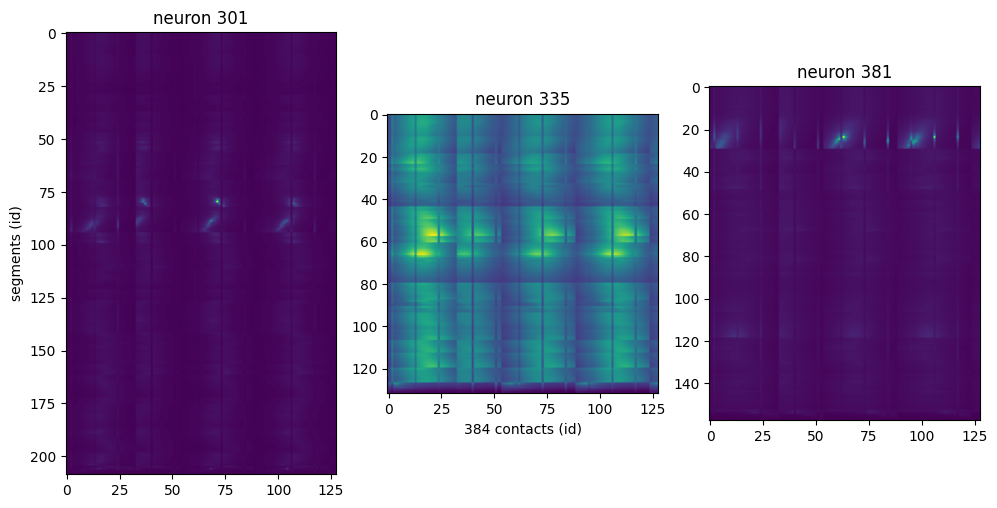

In [43]:
# plot three example neuron's segment x channel weights
figures, axes = plt.subplots(1,3, figsize=(10,10))

axes[0].imshow(weights["electrodes"]["electrode_grid"]["301"][:, :-1])
axes[0].set_title("neuron 301");
axes[0].set_ylabel("segments (id)");

axes[1].imshow(weights["electrodes"]["electrode_grid"]["335"][:, :-1])
axes[1].set_title("neuron 335");
axes[1].set_xlabel("384 contacts (id)");

axes[2].imshow(weights["electrodes"]["electrode_grid"]["381"][:, :-1])
axes[2].set_title("neuron 381");
plt.tight_layout()

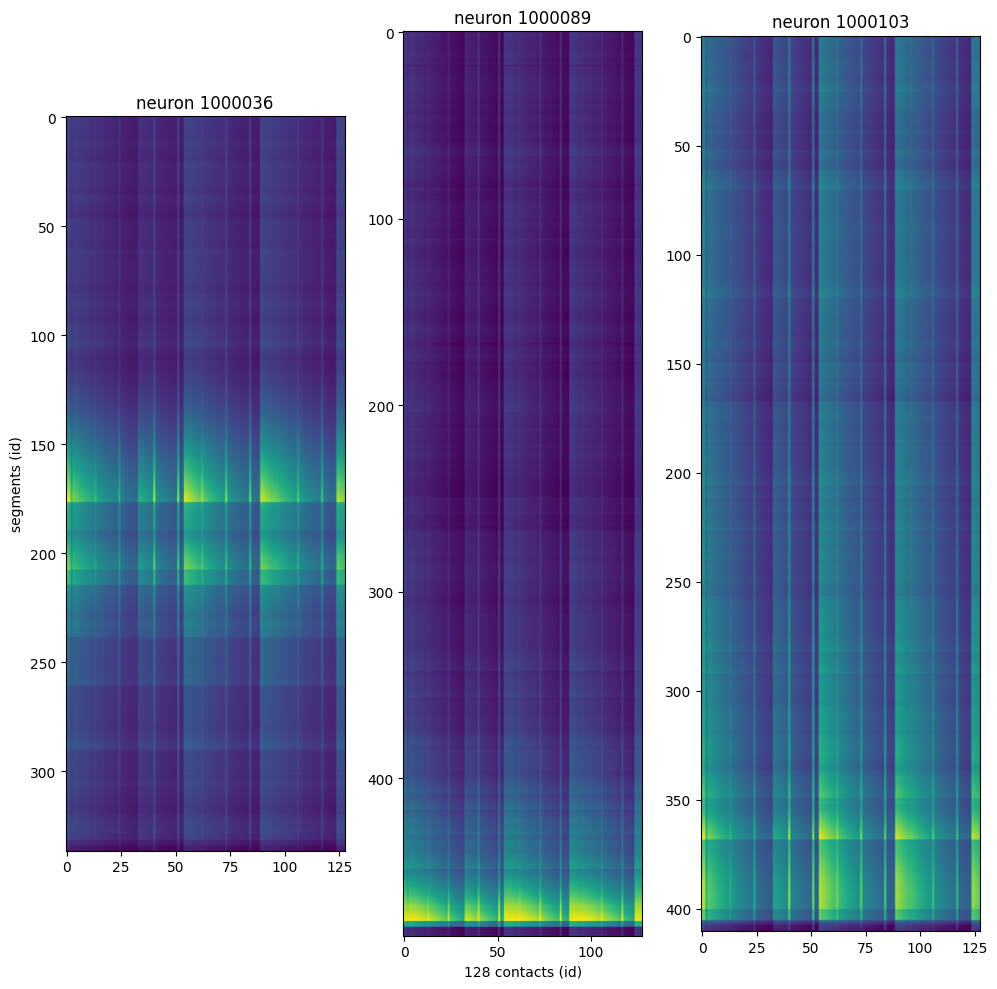

In [49]:
# plot each neuron's segment x channel weights
figures, axes = plt.subplots(1,3, figsize=(10,10))
axes[0].imshow(weights["electrodes"]["electrode_grid"]["1000036"][:, :-1])
axes[0].set_title("neuron 1000036");
axes[0].set_ylabel("segments (id)");

axes[1].imshow(weights["electrodes"]["electrode_grid"]["1000089"][:, :-1])
axes[1].set_title("neuron 1000089");
axes[1].set_xlabel("128 contacts (id)");

axes[2].imshow(weights["electrodes"]["electrode_grid"]["1000103"][:, :-1])
axes[2].set_title("neuron 1000103");
plt.tight_layout()

## Select 32 contacts that span most layers

To improve visibility, we projected all coordinates on the x-y plane.

In [52]:
# test the number of contacts
assert N_CONTACTS == weights["electrodes"]["electrode_grid"]["1000036"].shape[1]-1, "The number of contacts is unexpected"

# set contacts ids
all_contacts_ids = np.arange(0, N_CONTACTS)

# get all contact locations
all_contact_locations = []
for all_contact_i in all_contacts_ids:
    all_contact_locations.append(eval(f"""weights["electrodes"]["{all_contact_i}"]["position"][:]""").tolist())
all_contact_locations = np.array(all_contact_locations)

We calculated the euclidean distance between two nearest horizontal (x_pitch) and vertical (y_pitch) contacts:

In [55]:
def euclidean_distance(coord_1, coord_2):
    return np.sqrt(np.sum((coord_1 - coord_2)**2))

# get y_pitch (distance between the two closest contacts within the same column)
y_pitch = euclidean_distance(all_contact_locations[0,:], all_contact_locations[1,:])
print("y_pitch", y_pitch)

# get x_pitch (distance between the two closest contacts in two parallel columns)
x_pitch = euclidean_distance(all_contact_locations[0,:], all_contact_locations[96,:])
print("x_pitch", x_pitch)

y_pitch 22.500000000000536
x_pitch 67.50000000000003


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


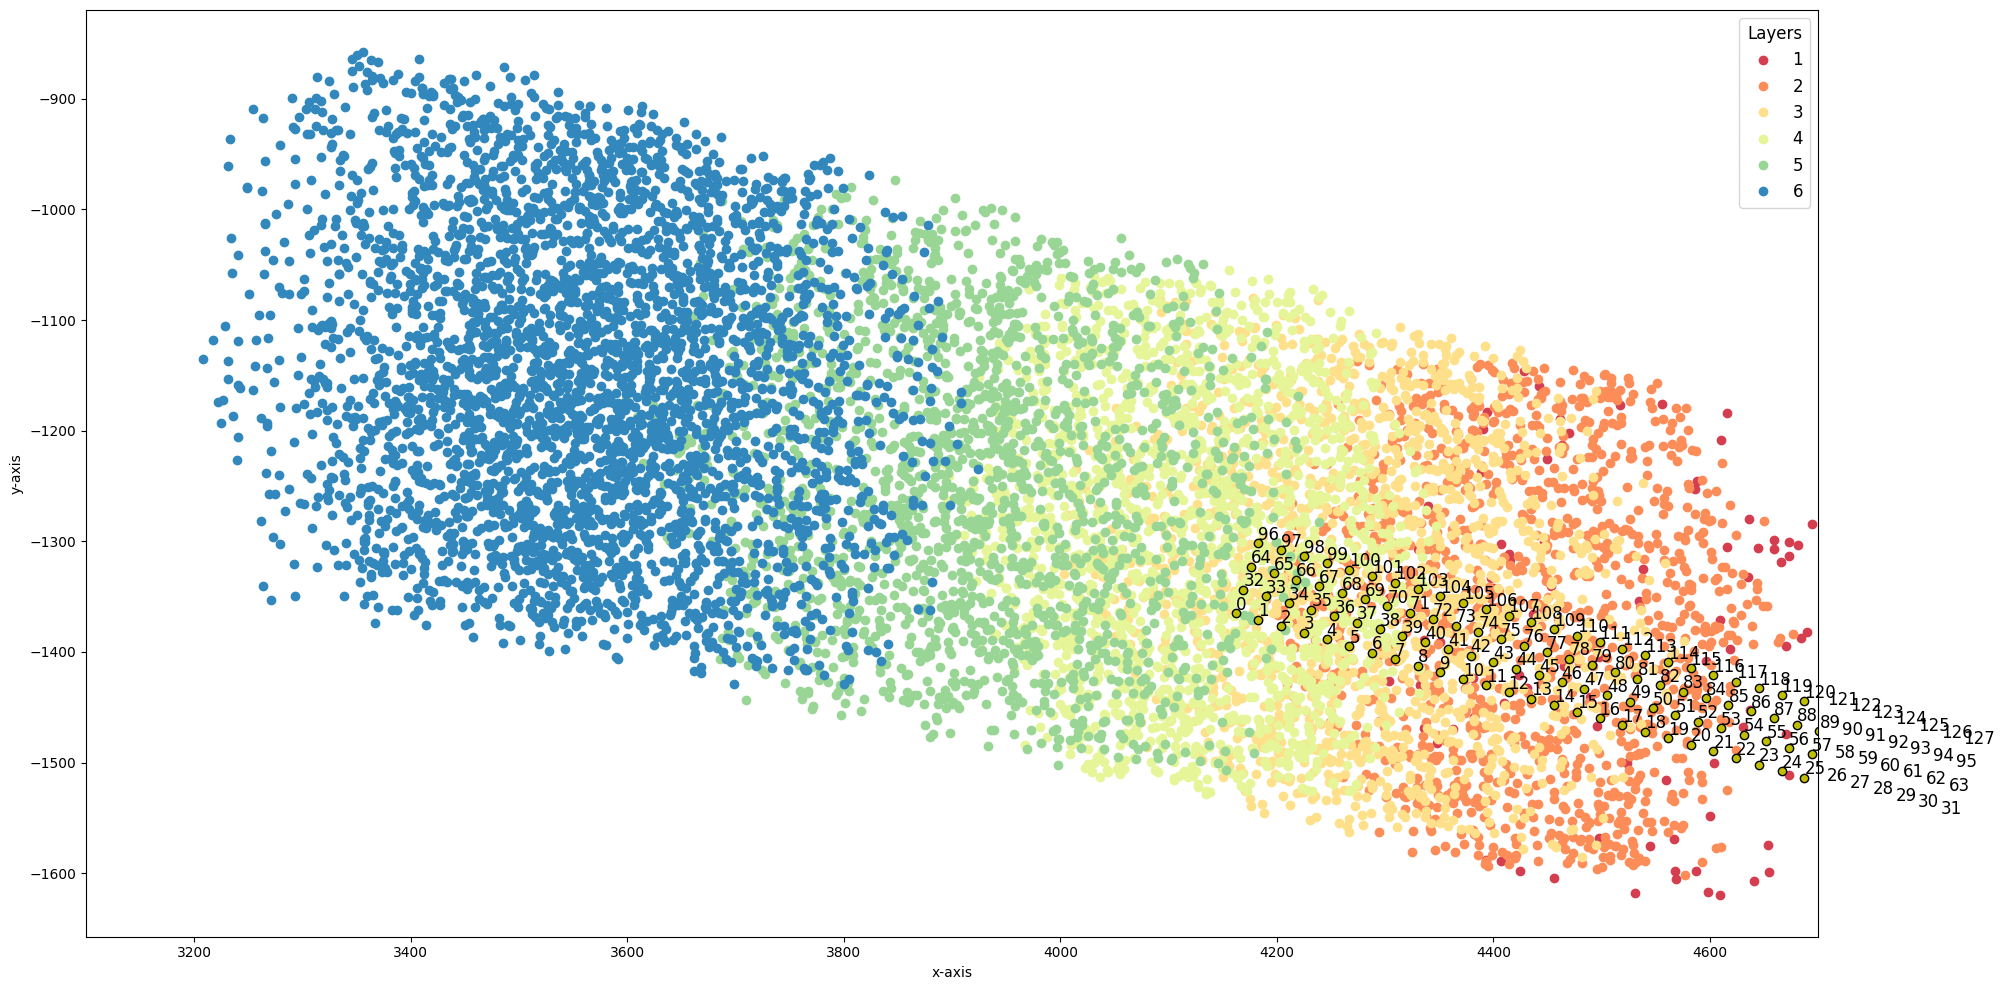

In [60]:
# Get coordinates of a sample of the column cells (else rendering last a while)
simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)
microcircuit_coord = microcircuit["soma_location"].sample(n=10000, axis=0, random_state=1)

# get cell layers
cell_layers = simulation["circuit"].cells.get(group=microcircuit["gid"], properties="layer")

# angle view 4
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plot cells colored by layer
layer_color = [
    (0,0,0),
    (213/255, 62/255, 79/255),
    (252/255, 141/255, 89/255),
    (254/255, 224/255, 139/255),
    (230/255, 245/255, 152/255),
    (153/255, 213/255, 148/255),
    (50/255, 136/255, 189/255)
    ]

layers = np.sort(cell_layers.unique())

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers==layer_i],
        microcircuit_coord.y[cell_layers==layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    all_contact_locations[:, 0],
    all_contact_locations[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# annotate contacts with their ids
for ix in range(len(all_contact_locations)):
    ax.text(
        all_contact_locations[ix, 0],
        all_contact_locations[ix, 1] + 3,
        "%s" % (str(all_contacts_ids[ix])),
        size=12,
        zorder=100,
        color="k",
    )
    
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_xlim([3100, 4700])
plt.tight_layout()
legend = ax.legend(layers, fontsize=12, title = "Layers")
plt.setp(legend.get_title(),fontsize=12)
plt.show()

# references

(1) https://docs.h5py.org/en/latest/high/group.html